In [40]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt 

In [41]:
df= pd.read_csv("delivery_time.csv")
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [42]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [43]:
#df = df.drop(df[df['Delivery Time']> 23].index)

In [44]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


                             0          1
Intercept            -5.862666   8.182033
np.log(Sorting_Time)  5.115458  12.971369


Text(0, 0.5, 'Delivery_Time')

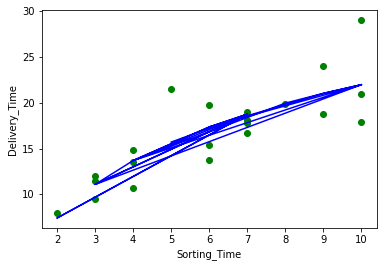

In [45]:
# Transforming variables for accuracy
import statsmodels.formula.api as smf
model1=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=df).fit()
model1.params
model1.summary()
print(model1.conf_int(0.01)) # 99% confidence level
pred1 = model1.predict(pd.DataFrame(df['Sorting_Time']))
#pred1.corr(wcat.AT)
# pred2 = model2.predict(wcat.iloc[:,0])
#pred2
plt.scatter(x=df['Sorting_Time'],y=df['Delivery_Time'],color='green');plt.plot(df['Sorting_Time'],pred1,color='blue');plt.xlabel('Sorting_Time');plt.ylabel('Delivery_Time')


                     0         1
Intercept     1.826774  2.415969
Sorting_Time  0.061378  0.149725


Text(0, 0.5, 'Delivery_time')

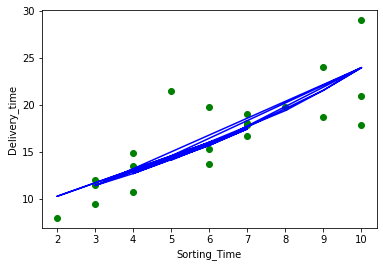

In [46]:
# Exponential transformation
import statsmodels.formula.api as smf
model2=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=df).fit()
model2.params
model2.summary()
print(model2.conf_int(0.01)) # 99% confidence level
pred_log = model2.predict(pd.DataFrame(df['Sorting_Time']))
pred_log
pred2=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred2
pred2.corr(df.Delivery_Time)
plt.scatter(x=df['Sorting_Time'],y=df['Delivery_Time'],color='green');plt.plot(df.Sorting_Time,np.exp(pred_log),color='blue');plt.xlabel('Sorting_Time');plt.ylabel('Delivery_time')

In [47]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =0)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


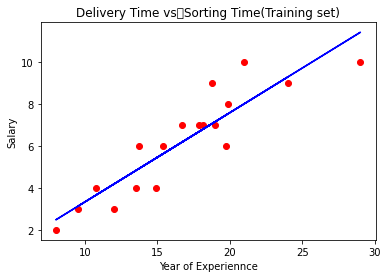

In [50]:
plt.scatter(X_train, y_train,color= 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Delivery Time vs	Sorting Time(Training set)')
plt.xlabel('Year of Experiennce')
plt.ylabel('Salary')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


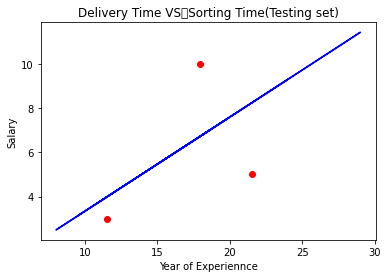

In [51]:
plt.scatter(X_test, y_test,color= 'red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Delivery Time VS	Sorting Time(Testing set)')
plt.xlabel('Year of Experiennce')
plt.ylabel('Salary')
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)

print(r2_score*100,'%')

14.191673226061475 %
